## **Prepare environment, load and prepare data**

Required environment

*  Python 3.12.12
*  numpy: 2.0.2
*  pandas: 2.2.2
*  seaborn: 0.13.2
*  matplotlib: 3.10.0









In [1]:
# check python version
!python --version

Python 3.12.12


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("pandas:",pd.__version__)
print("numpy:",np.__version__)
print("seaborn:",sns.__version__)
print("matplotlib:",plt.matplotlib.__version__)

pandas: 2.2.2
numpy: 2.0.2
seaborn: 0.13.2
matplotlib: 3.10.0


In [3]:
# import dataset

df = pd.read_csv('https://data.ontario.ca/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86/resource/4cc07c1b-62ed-4ece-a2a4-d05d0f45081c/download/img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv')

In [4]:
# Rename the ' Men' column to 'Men Wage' and ' Women' to 'Women Wage' to remove
# leading space and add clarity
df_renamed = df.rename(columns={' Men': 'Men_Wage', ' Women': 'Women_Wage'})

# Display the first few rows to show the renamed columns
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6


In [5]:
# change "0.0" in dataset to NaN and flag as suppressed
for col in ['Men_Wage', 'Women_Wage']:
    # Create a new column to flag suppressed values for each gender
    df_renamed[f'{col}_is_suppressed'] = df_renamed[col].astype(str).str.strip() == "0.0"
    # Replace "0.0" strings with np.nan
    df_renamed[col] = df_renamed[col].replace('0.0', np.nan)

# Display the first few rows to show the new columns and replaced values
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage,Men_Wage_is_suppressed,Women_Wage_is_suppressed
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0,False,False
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5,False,False
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8,False,False
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8,False,False
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6,False,False


## **Research Questions 1**

Confirm the existence of the gender wage gap in Ontario.

Method: Compare mean and median wages by gender, use measure of dispersion (e.g. standard deviation) to assess wage variability and apply T-test to determine if the difference between genders is statistically significant.

In [6]:
# Filter for Ontario
df_ontario = df_renamed[df_renamed['GEOGRAPHY'] == ' Ontario']

print(df_ontario)


       YEAR GEOGRAPHY        IMMIGRANT   TYPE OF WORK             WAGE RATE  \
1080   2006   Ontario            Total  All employees    Median hourly wage   
1081   2006   Ontario            Total  All employees    Median hourly wage   
1082   2006   Ontario            Total  All employees    Median hourly wage   
1083   2006   Ontario            Total  All employees    Median hourly wage   
1084   2006   Ontario            Total  All employees    Median hourly wage   
...     ...       ...              ...            ...                   ...   
41035  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41036  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41037  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41038  2024   Ontario   Born in Canada      Part-time    Median hourly wage   
41039  2024   Ontario   Born in Canada      Part-time    Median hourly wage   

                         EDUCATION AGE GROUP  Both 

In [7]:
# multiple wage values per year for Men and Women

# Calculate average wage of Men in Ontario by year, filtering out surpressed values
mean_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].mean()
print(mean_men_wage_ontario_by_year)

YEAR
2006    19.573448
2007    19.916628
2008    20.840629
2009    20.779425
2010    21.115890
2011    21.496108
2012    21.786804
2013    21.752302
2014    22.361557
2015    22.909771
2016    23.580072
2017    24.359641
2018    24.354215
2019    25.171512
2020    26.998609
2021    27.773789
2022    28.299773
2023    29.504363
2024    30.153846
Name: Men_Wage, dtype: float64


In [8]:
# Calculate average wage of Women in Ontario by year, filtering out surpressed values
mean_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].mean()
print(mean_women_wage_ontario_by_year)

YEAR
2006    16.544607
2007    17.008758
2008    17.540894
2009    18.074103
2010    18.113158
2011    18.439391
2012    18.551525
2013    18.976190
2014    18.830310
2015    19.478176
2016    20.145688
2017    20.089408
2018    20.838391
2019    21.483449
2020    23.143099
2021    23.894471
2022    24.163075
2023    25.499547
2024    26.261702
Name: Women_Wage, dtype: float64


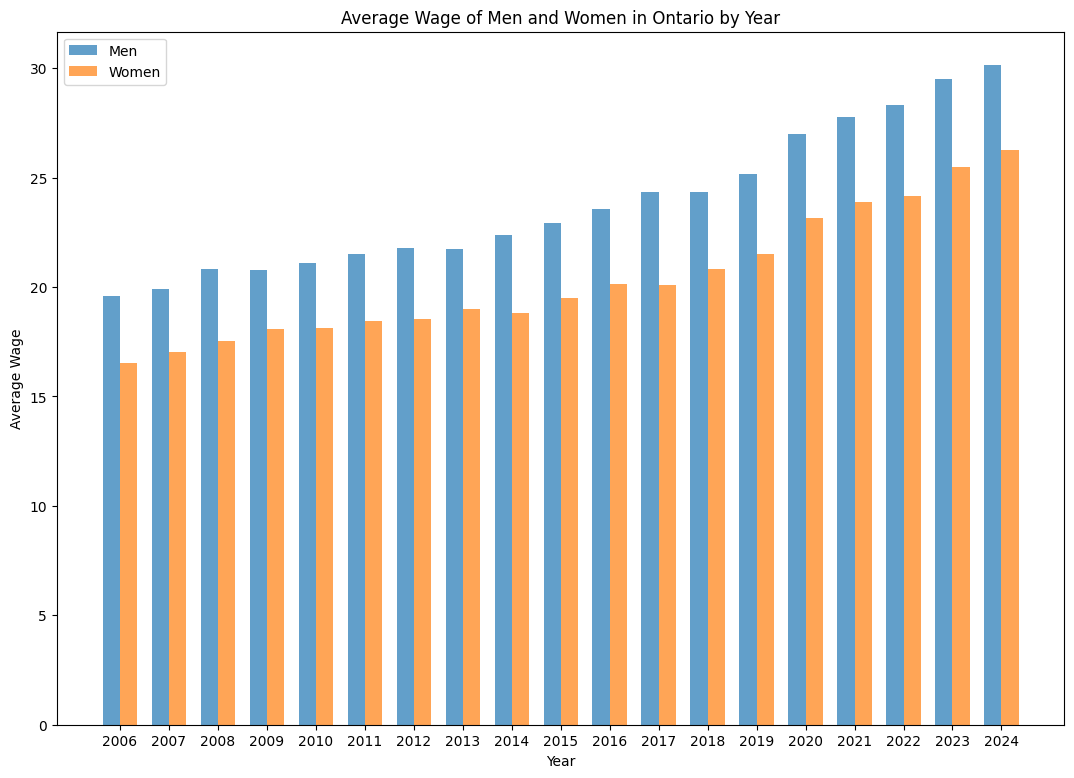

In [9]:
# Plot side-by-side bar graph comparing the mean wage of men and women in ontario by year

bar_width = 0.35
r1 = mean_men_wage_ontario_by_year.index
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(13, 9))
plt.bar(r1, mean_men_wage_ontario_by_year.values, width=bar_width, label='Men', alpha=0.7)
plt.bar(r2, mean_women_wage_ontario_by_year.values, width=bar_width, label='Women', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Average Wage')
plt.title('Average Wage of Men and Women in Ontario by Year')
plt.xticks([r + bar_width/2 for r in r1], r1) # Set x-axis ticks to be in the middle of the two bars
plt.legend()
plt.show()

In [10]:
# Calculate median wage of men in Ontario by year, filtering out supressed values
median_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].median()
print(median_men_wage_ontario_by_year)

YEAR
2006    18.50
2007    18.80
2008    20.00
2009    19.90
2010    20.00
2011    20.00
2012    20.00
2013    20.00
2014    20.65
2015    21.60
2016    21.55
2017    22.90
2018    22.00
2019    23.50
2020    25.00
2021    26.00
2022    25.00
2023    27.00
2024    27.80
Name: Men_Wage, dtype: float64


In [11]:
# Calculate median wage of women in Ontario by year, filtering out supressed values
median_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].median()
print(median_women_wage_ontario_by_year)

YEAR
2006    15.00
2007    15.00
2008    16.40
2009    17.00
2010    16.60
2011    17.00
2012    16.80
2013    17.75
2014    17.00
2015    18.00
2016    18.95
2017    18.00
2018    19.00
2019    19.55
2020    21.05
2021    22.00
2022    23.00
2023    25.00
2024    24.00
Name: Women_Wage, dtype: float64


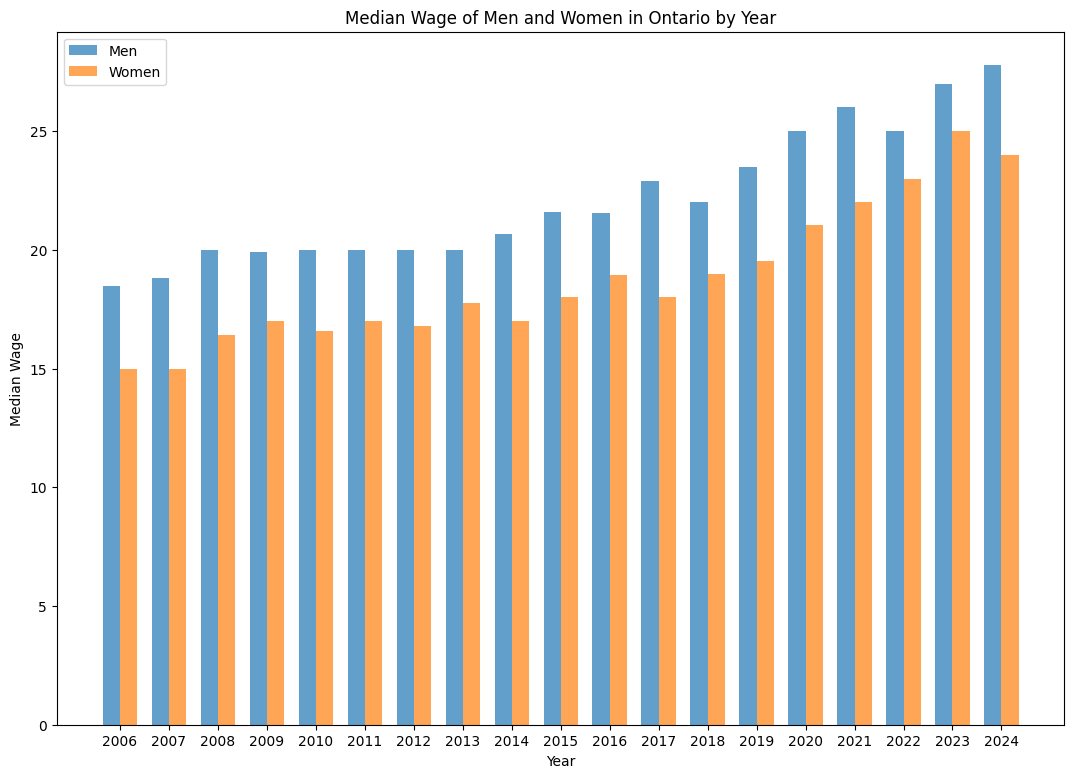

In [12]:
# Plot side-by-side bar graph comparing the median wage of men and women in ontario by year

bar_width = 0.35
r1 = median_men_wage_ontario_by_year.index
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(13, 9))
plt.bar(r1, median_men_wage_ontario_by_year.values, width=bar_width, label='Men', alpha=0.7)
plt.bar(r2, median_women_wage_ontario_by_year.values, width=bar_width, label='Women', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Median Wage')
plt.title('Median Wage of Men and Women in Ontario by Year')
plt.xticks([r + bar_width/2 for r in r1], r1) # Set x-axis ticks to be in the middle of the two bars
plt.legend()
plt.show()

Mean wage for Men appears greater than Women. Median wage for Men also appears greather than Women. There is a gap every year, with Men earning more than Women.

*Is this difference significant?*

In [13]:
# Calculate standard devition of wages of Men in Ontario, filtering out suppressed values
std_men_wage_ontario_by_year = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False].groupby('YEAR')['Men_Wage'].std()
print(std_men_wage_ontario_by_year)


YEAR
2006    6.481800
2007    6.743713
2008    6.354666
2009    6.699828
2010    6.634535
2011    7.159871
2012    7.151617
2013    7.384537
2014    7.227642
2015    7.523232
2016    7.686729
2017    8.046130
2018    7.865524
2019    7.849018
2020    8.310727
2021    8.352899
2022    8.477455
2023    8.679959
2024    9.318156
Name: Men_Wage, dtype: float64


In [14]:
# Calculate standard deviation of wages of Women in Ontario, filtering out suppressed values
std_women_wage_ontario_by_year = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False].groupby('YEAR')['Women_Wage'].std()
print(std_women_wage_ontario_by_year)

YEAR
2006    5.518324
2007    5.981268
2008    6.067184
2009    6.116707
2010    5.983664
2011    6.449131
2012    6.238188
2013    6.433839
2014    6.228671
2015    6.549841
2016    6.633303
2017    6.368067
2018    6.170394
2019    6.311805
2020    6.951917
2021    6.917624
2022    6.771782
2023    7.403907
2024    7.489093
Name: Women_Wage, dtype: float64


In [15]:
from scipy import stats

# Filter out suppressed values for Men and Women in Ontario
men_wages = df_ontario[df_ontario['Men_Wage_is_suppressed'] == False]['Men_Wage']
women_wages = df_ontario[df_ontario['Women_Wage_is_suppressed'] == False]['Women_Wage']

# Perform independent samples t-test
ttest_result = stats.ttest_ind(men_wages, women_wages, nan_policy='omit')

# Print the results of the t-test
print("Independent Samples T-test Results:")
print(f"Test Statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")

Independent Samples T-test Results:
Test Statistic: 41.0730
P-value: 0.0000


The t-test confirms the existance of a wage gap between 'Men' and 'Women'.

Based on the p-value, which is 0.0000 (likely a very small number rounded to four decimal places), which is less than the standard significance level of 0.05, there is a statistically significant difference between the wages of men and women in Ontario.